<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/%08practice-linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

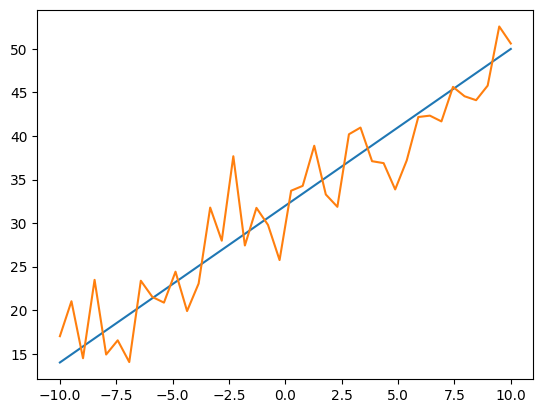

In [2]:
x = np.linspace(-10, 10, 40)
y_ideal = 1.8*x + 32.
y_noise = y_ideal + 4*np.random.randn((40)) # 노이즈 추가

plt.plot(x,y_ideal, x, y_noise)

In [3]:
x = torch.tensor(x).float()
y = torch.tensor(y_noise).float()

In [4]:
def linear(x, w, b):
  y = w * x + b
  return y

def loss(pred, label):
  mse = ((pred - label)**2).mean()
  return mse

In [6]:
def training(x, y, params, model, n_epoch, optimizer):
  for epoch in range(n_epoch):
    pred = model(x, *params)
    l = loss(pred, y)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f"Epoch {epoch}: Loss {l}")

  return params

In [18]:
params = torch.tensor(
    [1., 0.],
    requires_grad=True
)

optimizer = optim.SGD(
    [params],
    lr = 1e-3
)

training(x, y, params, linear, 5000, optimizer)

Epoch 0: Loss 1042.7635498046875
Epoch 1000: Loss 30.87881088256836
Epoch 2000: Loss 12.691645622253418
Epoch 3000: Loss 12.359872817993164
Epoch 4000: Loss 12.353818893432617


tensor([ 1.6525, 31.8653], requires_grad=True)

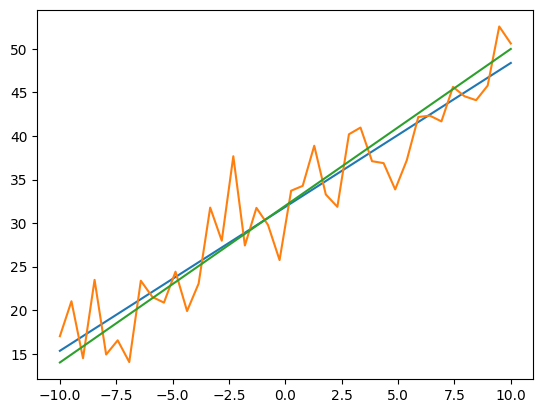

In [21]:
pred = linear(x, *params)

plt.plot(x, pred.detach(), x, y_noise, x, y_ideal)